# PCA on Seattle Weather Data

Using PCA to reduce the number of features for the seattle weather data.

In [1]:
# Making necessary imports
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.decomposition import PCA

## Preprocessing Data

In [34]:
# Load the data
df = pd.read_csv('../data/seattle_weather_1948-2017.csv')

In [35]:
# Take a look at the data
df.head()

,DATE,PRCP,TMAX,TMIN,RAIN
0,1948-01-01,0.47,51,42,True
1,1948-01-02,0.59,45,36,True
2,1948-01-03,0.42,45,35,True
3,1948-01-04,0.31,45,34,True
4,1948-01-05,0.17,45,32,True


In [36]:
# Data shape
df.shape

(25551, 5)

In [37]:
# Dataset structure and information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25551 entries, 0 to 25550
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    25551 non-null  object 
 1   PRCP    25548 non-null  float64
 2   TMAX    25551 non-null  int64  
 3   TMIN    25551 non-null  int64  
 4   RAIN    25548 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 998.2+ KB


In [38]:
Check for missing values
df.isna().sum()

DATE    0
PRCP    3
TMAX    0
TMIN    0
RAIN    3
dtype: int64

In [39]:
# Investigate observations with missing values
df[df.isna().any(axis=1)]

,DATE,PRCP,TMAX,TMIN,RAIN
18415,1998-06-02,NaN,72,52,NaN
18416,1998-06-03,NaN,66,51,NaN
21067,2005-09-05,NaN,70,52,NaN


In [40]:
# Remove missing values
df = df.dropna()

In [41]:
# Double check missing values
df.isna().sum()

DATE    0
PRCP    0
TMAX    0
TMIN    0
RAIN    0
dtype: int64

In [42]:
# Take another look of the dataset structure
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25548 entries, 0 to 25550
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    25548 non-null  object 
 1   PRCP    25548 non-null  float64
 2   TMAX    25548 non-null  int64  
 3   TMIN    25548 non-null  int64  
 4   RAIN    25548 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 1.2+ MB


In [43]:
# RAIN feature is an object type. Let's investigate its unique values
df['RAIN'].unique()

array([True, False], dtype=object)

In [45]:
# RAIN feature is an object type because it had missing data (i.e. NaN) before removing them
# Since it is clean now, let's change its type to Boolean
df['RAIN'] = df['RAIN'].astype(bool)

In [46]:
# Take a final look at the data information
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25548 entries, 0 to 25550
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    25548 non-null  object 
 1   PRCP    25548 non-null  float64
 2   TMAX    25548 non-null  int64  
 3   TMIN    25548 non-null  int64  
 4   RAIN    25548 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 1022.9+ KB


<br>

Since PCA cannot handle non-numeric data(i.e. DATE feature), we are dividing the dataset into two sets. One set takes the DATE feature and the other takes the remaining features.

In [13]:
dates = df['DATE'].copy()

In [14]:
X = df.iloc[:, 1:].copy()

## Principal Component Analysis (PCA)

A vital part of using PCA in practice is the ability to estimate how many components are needed to describe the data. This can be determined by looking at the cumulative explained variance ratio as a function of the number of components:

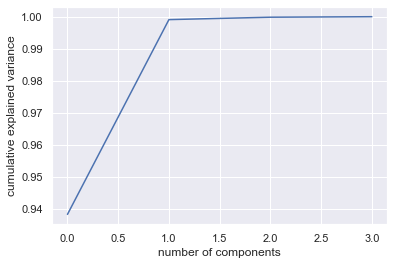

In [15]:
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

This plot quantifies how much of the total, 4-dimensional variance is contained within the first N components. We see that with the Seattle Weather dataset we need only one component to describe close to 100% of the variance.

In [16]:
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X)

In [17]:
X_pca.shape

(25548, 1)

In [18]:
X_pca

array([[ 8.52390123],
       [16.83466887],
       [17.38411295],
       ...,
       [18.1870426 ],
       [15.41690171],
       [12.64676081]])

In [19]:
X_new = pca.inverse_transform(X_pca)

In [20]:
X_new.shape

(25548, 4)

In [21]:
X_new

array([[ 0.13072531, 52.42442515, 39.82581395,  0.51635007],
       [ 0.15461629, 45.48378997, 35.25545047,  0.60380933],
       [ 0.15619578, 45.02492853, 34.95329317,  0.60959146],
       ...,
       [ 0.15850397, 44.35437172, 34.51173584,  0.61804118],
       [ 0.15054064, 46.66782075, 36.0351271 ,  0.5888893 ],
       [ 0.1425773 , 48.98126978, 37.55851835,  0.55973743]])